### Importing relevant libraries

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as  sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.model_selection import train_test_split
from scipy.stats import norm
sns.set()
import warnings
warnings.filterwarnings('ignore')

### Loading the Dataset

In [2]:
raw_data = pd.read_csv("C:\Users\HP\Desktop\Machine learning\Projects\House price prediction\dataset\house_price_train.csv")
raw_data.head(20)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [3]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
raw_data.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

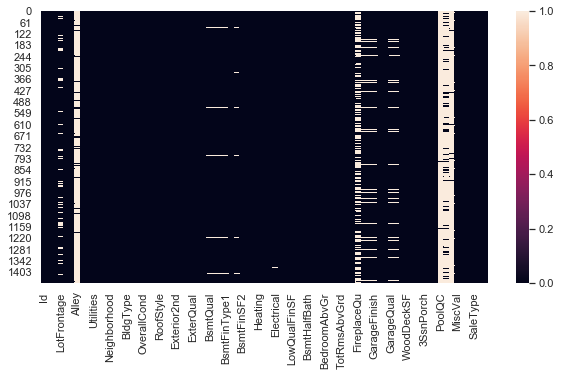

In [5]:
plt.figure(figsize=(10,5))
sns.heatmap(raw_data.isnull())

### Handling missing values

In [6]:
raw_data["LotFrontage"] = raw_data['LotFrontage'].fillna(raw_data['LotFrontage'].mean())

In [7]:
raw_data['FireplaceQu'] = raw_data["FireplaceQu"].fillna(raw_data['FireplaceQu'].mode()[0])
raw_data['GarageType'] = raw_data["GarageType"].fillna(raw_data['GarageType'].mode()[0])
raw_data['GarageYrBlt'] = raw_data["GarageYrBlt"].fillna(raw_data['GarageYrBlt'].mean())
raw_data['GarageFinish'] = raw_data["GarageFinish"].fillna(raw_data['GarageFinish'].mode()[0])
raw_data['GarageCond'] = raw_data["GarageCond"].fillna(raw_data['GarageCond'].mode()[0])
raw_data['GarageQual'] = raw_data["GarageQual"].fillna(raw_data['GarageQual'].mode()[0])

In [8]:
#Droping feature having null values more than 50%
raw_data = raw_data.drop(["Alley","PoolQC","Fence","MiscFeature"],axis = 1)
#Droping Id because it has no prediction power towards saleprice
raw_data = raw_data.drop(["Id"],axis = 1 )

In [9]:
raw_data.isnull().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 76, dtype: int64

In [10]:
raw_data.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

In [11]:
data_with_no_mv = raw_data.dropna(axis = 0)
data_with_no_mv.shape

(1412, 76)

### Handling catagorical features

In [12]:
#Fetching categorical variable
columns = data_with_no_mv.select_dtypes(include=['object']).copy()
columns = columns.columns.values
columns

array(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', 'KitchenQual', 'Functional',
       'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype=object)

In [13]:
def category_onehot(colmns):
    df_final = data_with_test
    i = True
    for f in columns:
        df = pd.get_dummies(data_with_test[f],drop_first = True)
        data_with_test.drop([f],axis = 1,inplace = True)
        if i:
            df_final = df.copy()
        else:
            df_final = pd.concat([df_final,df],axis = 1)
        i = False
    df_final = pd.concat([data_with_test,df_final],axis = 1)
    return df_final

In [14]:
cols = ['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', 'KitchenQual', 'Functional',
       'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']

In [15]:
updated_test = pd.read_csv("C:\Users\HP\Desktop\Machine learning\Projects\House price prediction\dataset\house_price_test.csv")
data_with_test = pd.concat([updated_test,data_with_no_mv],axis = 0)
data_with_test

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,120,0,0,6,2010,WD,Normal,NaN
1,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,12500,6,2010,WD,Normal,NaN
2,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,3,2010,WD,Normal,NaN
3,60,RL,78.0,9978,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,6,2010,WD,Normal,NaN
4,120,RL,43.0,5005,Pave,IR1,HLS,AllPub,Inside,Gtl,...,0,0,144,0,0,1,2010,WD,Normal,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,8,2007,WD,Normal,175000.0
1456,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2010,WD,Normal,210000.0
1457,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,2500,5,2010,WD,Normal,266500.0
1458,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,112,0,0,0,0,4,2010,WD,Normal,142125.0


In [16]:
#converting the catgorical feature into dummies
data_with_test = category_onehot(cols)

In [17]:
data_with_test.shape

(2871, 236)

In [18]:
data_with_test = data_with_test.loc[:,~data_with_test.columns.duplicated()]
data_with_test.shape

(2871, 176)

In [19]:
x = data_with_test.drop(['SalePrice'],axis = 1)

In [20]:
#Checking for correlated features
x_corr = x.corr()
UPPER = x_corr.where(np.triu(np.ones(x_corr.shape), k=1).astype(np.bool))
correlated_features = [column for column in UPPER.columns if any(UPPER[column] >0.75)]
print(correlated_features,'\n',len(correlated_features))

['1stFlrSF', 'TotRmsAbvGrd', 'GarageYrBlt', 'GarageArea', 'Somerst', '2Story', 'Brk Cmn', 'CmentBd', 'Partial'] 
 9


In [21]:
data_with_test = data_with_test.drop(correlated_features,axis = 1)
data_with_test.shape

(2871, 167)

In [22]:
#checking for most relevant feature towards target
cor = data_with_test.corr()
cor_target = abs(cor['SalePrice'])
relevant_feature = cor_target[cor_target>0.50]
relevant_feature = pd.DataFrame(relevant_feature)
print(relevant_feature)

              SalePrice
OverallQual    0.786765
YearBuilt      0.518736
YearRemodAdd   0.500266
TotalBsmtSF    0.611084
GrLivArea      0.711080
FullBath       0.575604
GarageCars     0.641825
SalePrice      1.000000
TA             0.587808


In [23]:
#Descriptive statistics
data_with_test.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,ConLD,ConLI,ConLw,New,Oth,WD,AdjLand,Alloca,Family,Normal
count,2871.000000,2871.000000,2871.000000,2871.000000,2871.000000,2871.000000,2871.000000,2871.000000,2871.000000,2871.000000,...,2871.000000,2871.000000,2871.000000,2871.000000,2871.000000,2871.000000,2871.000000,2871.000000,2871.000000,2871.000000
mean,57.119471,69.339352,10172.198537,6.108325,5.574364,1971.392546,1984.414490,102.999874,446.330618,50.245426,...,0.008708,0.003135,0.002786,0.082201,0.002438,0.864855,0.003831,0.006966,0.016022,0.823058
std,42.525573,21.435570,7930.555382,1.398520,1.112155,30.375780,20.815037,179.485001,455.218807,170.277580,...,0.092924,0.055911,0.052723,0.274719,0.049326,0.341937,0.061791,0.083187,0.125583,0.381686
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,60.000000,7500.000000,5.000000,5.000000,1954.000000,1966.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
50%,50.000000,69.000000,9464.000000,6.000000,5.000000,1973.000000,1993.000000,0.000000,375.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
75%,70.000000,79.000000,11592.000000,7.000000,6.000000,2001.000000,2004.000000,165.000000,735.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1526.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### splitting the test and train data

In [24]:
train_data = data_with_test.iloc[1460:,:].reset_index(drop = True)
test_data = data_with_test.iloc[:1459,:]
print(train_data["SalePrice"].isnull().sum())
test_data = test_data.drop(["SalePrice"],axis = 1)
test_data

0


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,ConLD,ConLI,ConLw,New,Oth,WD,AdjLand,Alloca,Family,Normal
0,20,80.0,11622,5,6,1961,1961,0.0,468.0,144.0,...,0,0,0,0,0,1,0,0,0,1
1,20,81.0,14267,6,6,1958,1958,108.0,923.0,0.0,...,0,0,0,0,0,1,0,0,0,1
2,60,74.0,13830,5,5,1997,1998,0.0,791.0,0.0,...,0,0,0,0,0,1,0,0,0,1
3,60,78.0,9978,6,6,1998,1998,20.0,602.0,0.0,...,0,0,0,0,0,1,0,0,0,1
4,120,43.0,5005,8,5,1992,1992,0.0,263.0,0.0,...,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,160,21.0,1936,4,7,1970,1970,0.0,0.0,0.0,...,0,0,0,0,0,1,0,0,0,1
1455,160,21.0,1894,4,5,1970,1970,0.0,252.0,0.0,...,0,0,0,0,0,1,0,0,0,0
1456,20,160.0,20000,5,7,1960,1996,0.0,1224.0,0.0,...,0,0,0,0,0,1,0,0,0,0
1457,85,62.0,10441,5,5,1992,1992,0.0,337.0,0.0,...,0,0,0,0,0,1,0,0,0,1


## Exploring the data

#### Removing the outliers

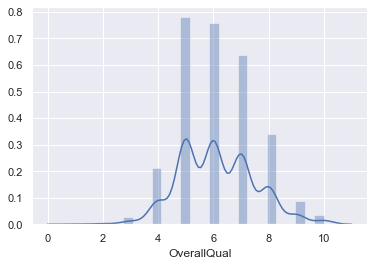

In [25]:
c = ['OverallQual', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', 'GrLivArea',
       'FullBath', 'GarageCars', 'SalePrice', 'TA']
sns.distplot(train_data[c[0]])

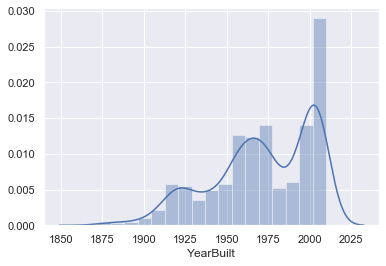

In [26]:
sns.distplot(train_data[c[1]])

In [27]:
q = train_data[c[1]].quantile(0.01)
train_data = train_data[train_data[c[1]]>q]

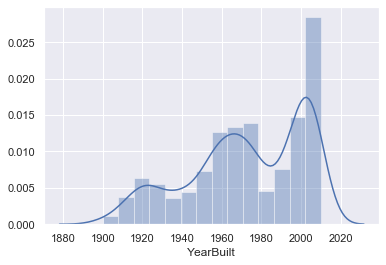

In [28]:
sns.distplot(train_data[c[1]])

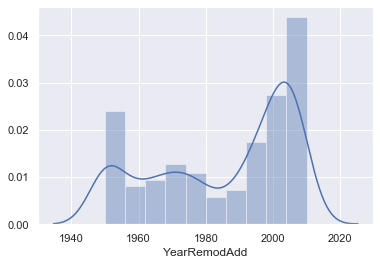

In [29]:
sns.distplot(train_data[c[2]])

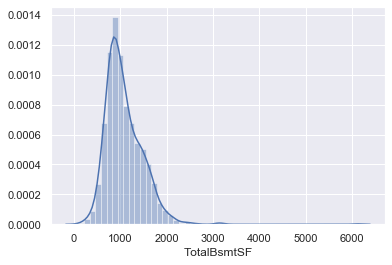

In [30]:
sns.distplot(train_data[c[3]])

In [31]:
q = train_data[c[3]].quantile(0.99)
train_data = train_data[train_data[c[3]]<q]

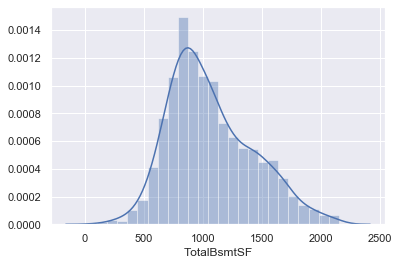

In [32]:
sns.distplot(train_data[c[3]])

(1382, 167)

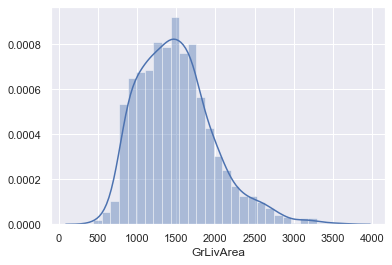

In [33]:
sns.distplot(train_data[c[4]])
train_data.shape

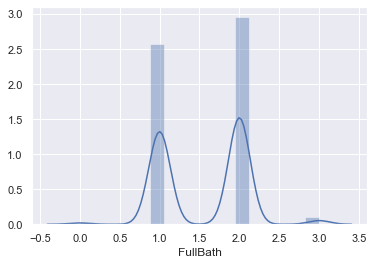

In [34]:
sns.distplot(train_data[c[5]])

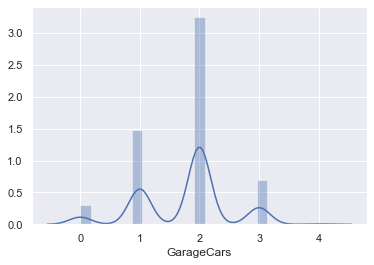

In [35]:
sns.distplot(train_data[c[6]])

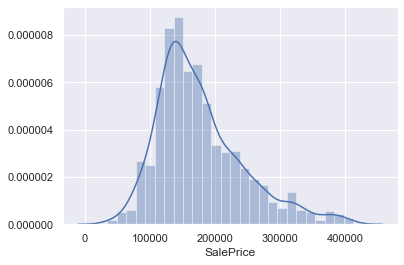

In [36]:
q = train_data[c[7]].quantile(0.99)
train_data = train_data[train_data[c[7]]<q]
sns.distplot(train_data[c[7]])

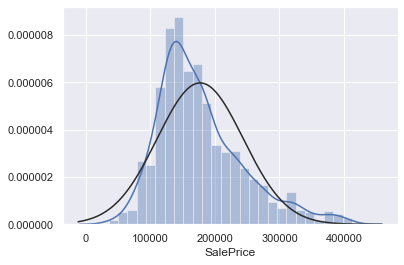

In [37]:
sns.distplot(train_data[c[7]],fit = norm)

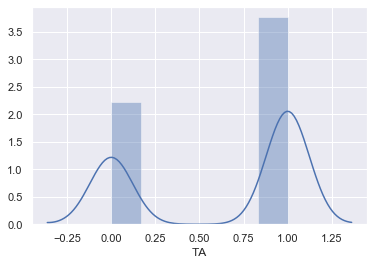

In [38]:
sns.distplot(train_data[c[8]])

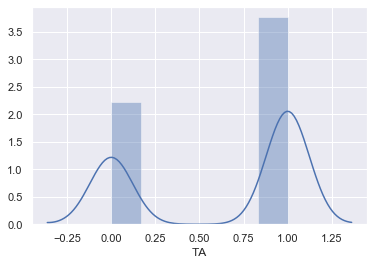

In [39]:
sns.distplot(train_data[c[8]])

In [40]:
data_cleaned = train_data.reset_index(drop = True)

### Checking the assumption

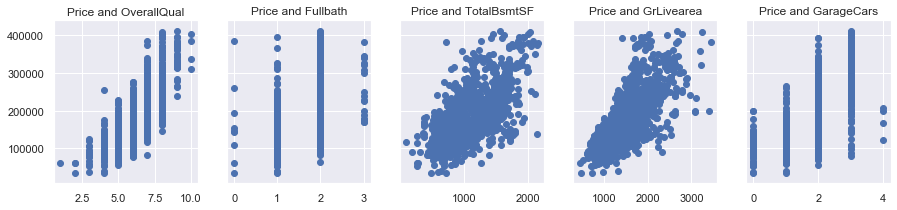

In [41]:
f, (ax1, ax2, ax3,ax4,ax5) = plt.subplots(1, 5, sharey=True, figsize =(15,3))
ax1.scatter(data_cleaned["OverallQual"],data_cleaned['SalePrice'])
ax1.set_title('Price and OverallQual')
ax2.scatter(data_cleaned['FullBath'],data_cleaned['SalePrice'])
ax2.set_title('Price and Fullbath')
ax3.scatter(data_cleaned['TotalBsmtSF'],data_cleaned['SalePrice'])
ax3.set_title('Price and TotalBsmtSF')
ax4.scatter(data_cleaned["GrLivArea"],data_cleaned['SalePrice'])
ax4.set_title('Price and GrLivearea')
ax5.scatter(data_cleaned["GarageCars"],data_cleaned['SalePrice'])
ax5.set_title('Price and GarageCars')

plt.show()

### Checking Multicollinearity in test and train data

In [42]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = data_cleaned[['OverallQual', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', 'GrLivArea',
       'FullBath', 'GarageCars','TA']]
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["features"] = variables.columns

In [43]:
vif

,VIF,features
0,59.069110,OverallQual
1,9256.254000,YearBuilt
2,9053.054551,YearRemodAdd
3,14.424738,TotalBsmtSF
4,22.131253,GrLivArea
5,18.188080,FullBath
6,12.050479,GarageCars
7,4.653322,TA


In [44]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variable = test_data[['OverallQual', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', 'GrLivArea',
       'FullBath', 'GarageCars','TA']]
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variable.values, i) for i in range(variable.shape[1])]
vif["features"] = variable.columns

In [45]:
vif

,VIF,features
0,50.145494,OverallQual
1,8395.450094,YearBuilt
2,8232.431131,YearRemodAdd
3,10.340845,TotalBsmtSF
4,21.917581,GrLivArea
5,17.321796,FullBath
6,11.365634,GarageCars
7,4.445080,TA


###### we can clearly see that yearbuilt and yearRemodAdd is too much collinear, so we will remove it.

### Removing multicollinearity

In [74]:
y = train_data["SalePrice"]
x = train_data.drop(["SalePrice","YearRemodAdd","YearBuilt"],axis = 1) # removing highly colinear feature too
test_data = test_data.drop(['YearRemodAdd','YearBuilt'],axis = 1)

In [75]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
test_data_scaled = scaler.fit_transform(test_data)

In [76]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size = 0.10,random_state =0)

### Random Forest Regression

In [77]:
randomfor_reg = RandomForestRegressor(n_estimators=167)
randomfor_reg.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=167, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [78]:
print("Accuracy score on testing data: ",randomfor_reg.score(x_test,y_test))
print("Accuracy Score on Training data: ",randomfor_reg.score(x_train,y_train))
random_pred = randomfor_reg.predict(x_test)

Accuracy score on testing data:  0.8981152125528267
Accuracy Score on Training data:  0.9817630902409602


In [79]:
print("Mean Sqaured error: ",mean_squared_error(y_test,random_pred))
print("Mean Absolute error: ",mean_absolute_error(y_test,random_pred))
print("r2 score: ",r2_score(y_test,random_pred))

Mean Sqaured error:  444121924.92101896
Mean Absolute error:  15246.194312105716
r2 score:  0.8981152125528267


### Hypertuning the model :Using RandomizedsearchCV

In [154]:
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 200, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [147]:
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = randomfor_reg, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(x_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   27.5s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  2.6min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=167,
                              

In [148]:
results = pd.DataFrame(rf_random.cv_results_)
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_features,param_max_depth,param_bootstrap,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.187456,2.247832e-07,0.015621,6.743496e-07,31,5,1,sqrt,30,True,"{'n_estimators': 31, 'min_samples_split': 5, '...",0.860653,0.827446,0.845954,0.844684,0.013586,54
1,1.192430,2.945458e-02,0.067688,1.472510e-02,200,5,1,sqrt,10,True,"{'n_estimators': 200, 'min_samples_split': 5, ...",0.864674,0.825494,0.848907,0.846358,0.016096,50
2,0.671717,2.209254e-02,0.020829,7.362268e-03,115,5,2,sqrt,10,False,"{'n_estimators': 115, 'min_samples_split': 5, ...",0.866978,0.831921,0.848804,0.849234,0.014315,39
3,6.646894,1.559557e-01,0.056181,6.114104e-03,200,2,4,auto,30,False,"{'n_estimators': 200, 'min_samples_split': 2, ...",0.782214,0.765520,0.816202,0.787979,0.021088,83
4,0.928829,4.307118e-02,0.040300,1.529098e-02,157,2,4,sqrt,10,True,"{'n_estimators': 157, 'min_samples_split': 2, ...",0.848281,0.812539,0.827712,0.829511,0.014647,71
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1.035670,4.451849e-02,0.008087,4.367453e-03,31,10,2,auto,40,False,"{'n_estimators': 31, 'min_samples_split': 10, ...",0.810431,0.756192,0.758448,0.775024,0.025054,93
96,3.585470,5.483420e-02,0.027644,3.770180e-03,94,2,1,auto,10,False,"{'n_estimators': 94, 'min_samples_split': 2, '...",0.768630,0.744459,0.747693,0.753594,0.010713,96
97,0.330615,2.069770e-02,0.003356,3.414415e-03,10,5,4,auto,100,False,"{'n_estimators': 10, 'min_samples_split': 5, '...",0.782172,0.764599,0.815241,0.787337,0.020994,87
98,1.261828,2.912904e-02,0.063923,4.705506e-03,200,2,2,sqrt,20,True,"{'n_estimators': 200, 'min_samples_split': 2, ...",0.867118,0.831128,0.848557,0.848935,0.014695,41


In [153]:
#rf_random.best_params_

{'n_estimators': 200,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 90,
 'bootstrap': True}

### Fitting the modle on randomizedsearch best parameters

In [80]:
randomfor_tune1 = RandomForestRegressor(bootstrap=True,max_depth=90,max_features='auto',min_samples_leaf=2,min_samples_split=2,n_estimators=200)
randomfor_tune1.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=90, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=2,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=200, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [81]:
print(randomfor_tune1.score(x_test,y_test))
randomtune_pred = randomfor_tune1.predict(x_test)

0.8976890502738156


In [82]:
print("Mean Sqaured error: ",mean_squared_error(y_test,randomtune_pred))
print("Mean Absolute error: ",mean_absolute_error(y_test,randomtune_pred))
print("r2 score: ",r2_score(y_test,randomtune_pred))

Mean Sqaured error:  445979591.96263945
Mean Absolute error:  15367.338291592936
r2 score:  0.8976890502738156


### Applying GridSearch HyperTuning

In [164]:
grid = {'n_estimators': [180,190,200],
 'min_samples_split': [2,3,4],
 'min_samples_leaf': [1,2,3],
 'max_features': [2,3],
 'max_depth': [70,80,90],
 'bootstrap': [True]}
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = randomfor_reg, param_grid = random_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [165]:
grid_search.fit(x_train,y_train)

Fitting 3 folds for each of 4320 candidates, totalling 12960 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   25.3s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  4.7min
[Parallel(n_jobs=-1)]: Done 1005 tasks      | elapsed:  7.0min
[Parallel(n_jobs=-1)]: Done 1450 tasks      | elapsed: 10.4min
[Parallel(n_jobs=-1)]: Done 1977 tasks      | elapsed: 14.1min
[Parallel(n_jobs=-1)]: Done 2584 tasks      | elapsed: 17.9min
[Parallel(n_jobs=-1)]: Done 3273 tasks      | elapsed: 22.3min
[Parallel(n_jobs=-1)]: Done 4042 tasks      | elapsed: 28.4min
[Parallel(n_jobs=-1)]: Done 4893 tasks      | elapsed: 33.4min
[Parallel(n_jobs=-1)]: Done 5824 tasks      | elapsed: 40.1min
[Parallel(n_jobs=-1)]: Done 6837 tasks      | elapsed: 48.4min
[Parallel(n_jobs=-1)]: Done 7930 tasks      | elapsed: 59.0min
[Parallel(n_jobs=-1)]: Done 9105 tasks      | 

GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=167, n_jobs=None,
                                             oob_score=False, rand...
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jobs=-1,
    

In [166]:
grid_result = pd.DataFrame(grid_search.cv_results_)
grid_result

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_bootstrap,param_max_depth,param_max_features,param_min_samples_leaf,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.291599,0.019482,0.005208,0.007365,True,10,auto,1,2,10,"{'bootstrap': True, 'max_depth': 10, 'max_feat...",0.864415,0.815293,0.853577,0.844428,0.021072,2263
1,0.781058,0.038256,0.015632,0.000017,True,10,auto,1,2,31,"{'bootstrap': True, 'max_depth': 10, 'max_feat...",0.879608,0.840848,0.873611,0.864689,0.017035,1031
2,1.353847,0.019482,0.015632,0.000017,True,10,auto,1,2,52,"{'bootstrap': True, 'max_depth': 10, 'max_feat...",0.885514,0.845475,0.870381,0.867123,0.016507,787
3,1.895386,0.057514,0.020829,0.007366,True,10,auto,1,2,73,"{'bootstrap': True, 'max_depth': 10, 'max_feat...",0.888045,0.841790,0.872191,0.867342,0.019192,753
4,2.483796,0.108967,0.015615,0.000013,True,10,auto,1,2,94,"{'bootstrap': True, 'max_depth': 10, 'max_feat...",0.890059,0.842308,0.873291,0.868553,0.019780,526
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4315,0.670468,0.016802,0.030293,0.000020,False,None,sqrt,4,10,115,"{'bootstrap': False, 'max_depth': None, 'max_f...",0.863015,0.822721,0.842272,0.842669,0.016452,2410
4316,0.802439,0.026520,0.043095,0.005293,False,None,sqrt,4,10,136,"{'bootstrap': False, 'max_depth': None, 'max_f...",0.860410,0.823475,0.842599,0.842161,0.015082,2449
4317,0.889953,0.022287,0.043778,0.004856,False,None,sqrt,4,10,157,"{'bootstrap': False, 'max_depth': None, 'max_f...",0.862360,0.824842,0.843423,0.843542,0.015317,2325
4318,0.983394,0.004602,0.057267,0.009492,False,None,sqrt,4,10,178,"{'bootstrap': False, 'max_depth': None, 'max_f...",0.859172,0.820796,0.846212,0.842060,0.015940,2455


In [177]:
#grid_search.best_params_

{'bootstrap': True,
 'max_depth': None,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 157}

### Fitting the mdoel on grid search best parameters

In [83]:
randomfor_tune2 = RandomForestRegressor(bootstrap=True,max_depth=None,max_features='auto',min_samples_leaf=1,min_samples_split=2,n_estimators=157)
randomfor_tune2.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=157, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [84]:
print(randomfor_tune2.score(x_test,y_test))
randomtune2_pred = randomfor_tune2.predict(x_test)

0.9004209745514242


In [85]:
print("Mean Sqaured error: ",mean_squared_error(y_test,randomtune2_pred))
print("Mean Absolute error: ",mean_absolute_error(y_test,randomtune2_pred))
print("r2 score: ",r2_score(y_test,randomtune2_pred))

Mean Sqaured error:  434070969.4949421
Mean Absolute error:  15054.963736110465
r2 score:  0.9004209745514242


### XGBoost Regression

In [86]:
import xgboost as xgb
xg_reg = xgb.XGBRegressor()

In [87]:
xg_reg.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [88]:
xg_reg.score(x_test,y_test)

0.9110269170833146

In [89]:
#predicting the price
xg_pred = xg_reg.predict(x_test)

In [90]:
from math import sqrt
print("Mean Sqaured error: ",mean_squared_error(y_test,xg_pred))
print("Mean Absolute error: ",mean_absolute_error(y_test,xg_pred))
print("r2 score: ",r2_score(y_test,xg_pred))

Mean Sqaured error:  387839027.21104485
Mean Absolute error:  14539.755531478102
r2 score:  0.9110269170833146


### plotting the scatter plot

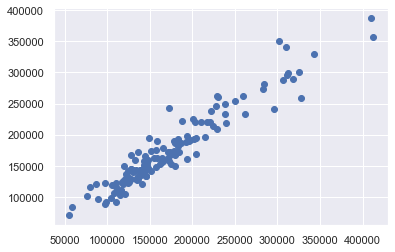

1071    205000.0
1119    185000.0
615     144000.0
31      165500.0
145     122000.0
Name: SalePrice, dtype: float64

In [91]:
plt.scatter(y_test,xg_pred)
plt.show()
y_test.head()

In [92]:
xg_prediction = x_test.copy()
xg_prediction = pd.DataFrame(xg_prediction,columns = x.columns)
xg_prediction["Predicted_AQI"] = xg_pred
xg_prediction["Original_AQI"] = y_test.reset_index(drop = True)
xg_prediction

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,ConLw,New,Oth,WD,AdjLand,Alloca,Family,Normal,Predicted_AQI,Original_AQI
0,0.070893,0.498773,0.013460,0.714369,0.370885,3.401156,-0.089273,-0.294206,-0.400040,-0.733844,...,-0.060567,-0.286842,-0.046881,0.379226,-0.046881,-0.076696,-0.121806,0.456597,194847.390625,205000.0
1,0.070893,0.308772,-0.122393,-0.059389,0.370885,1.041497,0.004634,-0.294206,-0.262254,-0.453552,...,-0.060567,-0.286842,-0.046881,0.379226,-0.046881,-0.076696,-0.121806,0.456597,172558.406250,185000.0
2,0.774512,-0.261232,-0.336261,-0.059389,-0.536755,-0.592113,1.483083,-0.294206,-1.334181,-0.010232,...,-0.060567,-0.286842,-0.046881,0.379226,-0.046881,-0.076696,-0.121806,0.456597,166134.953125,144000.0
3,-0.867265,0.023770,0.020652,-0.833148,-0.536755,-0.592113,1.391583,-0.294206,-0.446747,0.967931,...,-0.060567,-0.286842,-0.046881,0.379226,-0.046881,-0.076696,-0.121806,0.456597,178292.937500,165500.0
4,-0.867265,2.398787,0.001073,-0.833148,0.370885,-0.592113,0.664398,-0.294206,-0.743337,-0.259063,...,-0.060567,-0.286842,-0.046881,0.379226,-0.046881,-0.076696,-0.121806,0.456597,130801.492188,122000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,0.070893,0.026143,0.351993,-0.059389,0.370885,-0.592113,-0.621418,-0.294206,0.095055,-0.759585,...,-0.060567,-0.286842,-0.046881,0.379226,-0.046881,-0.076696,-0.121806,0.456597,168696.468750,177000.0
133,0.774512,0.026143,-0.330967,-0.833148,-0.536755,-0.592113,1.210990,-0.294206,-1.334181,-0.333426,...,-0.060567,-0.286842,-0.046881,0.379226,-0.046881,-0.076696,-0.121806,0.456597,133199.546875,135960.0
134,0.070893,0.023770,-0.264239,-0.059389,-0.536755,1.531580,-1.059655,-0.294206,0.431345,-0.868270,...,-0.060567,-0.286842,-0.046881,0.379226,-0.046881,-0.076696,-0.121806,0.456597,162977.031250,155000.0
135,0.070893,0.026143,0.126937,-0.059389,-0.536755,1.392421,-0.004997,-0.294206,-0.787708,-1.108521,...,-0.060567,-0.286842,-0.046881,0.379226,-0.046881,-0.076696,-0.121806,-2.190116,161933.609375,158900.0


### Final Prediction on test data

In [93]:
finalPrediction = xg_reg.predict(test_data_scaled)

In [94]:
sam_file  = pd.read_csv("C:\\Users\\HP\\Downloads\\sample_submission.csv")
finalPrediction = pd.DataFrame(finalPrediction)
finalPrediction = pd.concat([sam_file['Id'],finalPrediction],axis = 1)
finalPrediction.columns = ["Id",'SalePrice']
finalPrediction.to_csv("sample_submission2",index = False)

In [95]:
finalPrediction

,Id,SalePrice
0,1461,134387.406250
1,1462,157966.546875
2,1463,196641.875000
3,1464,197421.296875
4,1465,177225.250000
...,...,...
1454,2915,84857.960938
1455,2916,88843.921875
1456,2917,167636.906250
1457,2918,125269.078125
